<a href="https://colab.research.google.com/github/SvanaBirgis/Reiknifraedi/blob/main/Skilaverkefni/S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stærðfræði og reiknifræði vor 2022, skiladæmi 8**

Nafn: Svana Björg Birgisdóttir

Samverkamenn:

# **1. Verkefni 28 - Fjarlægð milli borga**

<img src = "https://cs.hi.is/python/_images/jord.png">

Ef sett er hnitakerfi í gegn um miðju jarðar þá verður þrívíður vigur sem byrjar í miðjunni og endar á stað á yfirborðinu með lengd 𝑙 og breidd 𝑏:


 \begin{pmatrix}
  R sin(l)cos(b) \\
  R cos(l)cos(b) \\
  R sin(b) 
 \end{pmatrix}



þar sem 𝑅 er radíus jarðar, 𝑅≈6370 km. Í stærðfræðigreiningu eru 𝑅, 𝑙 og 𝑏 kölluð kúluhnit (spherical coordinates). Hnattstaða Reykjavíkur er u.þ.b. 64°N og 22°W, og hattstaða London u.þ.b. 51.5°N og 0°W.

Horn 𝜃 milli vigra 𝑥 og 𝑦 má reikna með:


$𝜃=arccos \frac{x*y}{||x|| ||y||}$

<ol type="a">
  <li>Reiknið hornið milli Reykjavíkur og London mælt frá miðju jarðar.</li>
  <li>Lengd hringboga í hring með radíus 𝑟 sem spannar horn sem er 𝜃 radíanar er</li>
  $L=𝜃r$
  
  (sbr. [hringbogi á Wikipediu](https://en.wikipedia.org/wiki/Circular_arc)). Reiknið fjarlægðina milli Reykjavíkur og London (Siri segir 1890 km)
</ol>

Munið að það þarf að breyta gráðum í radíana og öfugt með math.radians og math.degrees (eða np-útgáfum af þessum föllum)


In [48]:
#a
import numpy as np
import numpy.linalg as la
from math import radians, cos, sin, asin, acos, sqrt, pi

lr = np.deg2rad(-22)
ll = np.deg2rad(0)
br = np.deg2rad(64)
bl = np.deg2rad(51.5)
R = 6370

x = np.array([R*sin(lr)*cos(br), R*cos(lr)*cos(br), R*sin(br)])

y = np.array([R*sin(ll)*cos(bl), R*cos(ll)*cos(bl), R*sin(bl)])

horn = np.degrees(acos((x@y)/(la.norm(x)*la.norm(y))))

print(f'Hornið milli Reykjavíkur og London er: {horn:.2f}°')



Hornið milli Reykjavíkur og London er: 16.98°


In [49]:
#b

L = R*np.deg2rad(horn)

print(f'Fjarlægðin milli Reykjavíkur og London er {L:.2f}km')

Fjarlægðin milli Reykjavíkur og London er 1887.39km


# **2.Verkefni 32 - Leslie-fylki og gröf**

Tegund lifir að hámarki í 5 ár. Fæðingartíðni og dánartíðni og upphafleg aldursdreifing er sem hér segir:

aldur | fæðinartíðni | dánartíðni | fjöldi
------|--------------|------------|-----------
0-1   | 0.1          | 0.1        | 100
1-2   | 0.3          | 0.1        | 200
2-3   | 0.5          | 0.2        | 300
3-4   | 0.4          | 0.4        | 200
4-5   | 0.1          | 1.0        | 200


<ol type="a">
  <li>Búið til Lesley-fylki (með NumPy) og ákvarðið stofnstærð í byrjun og á hverju ári næstu sjö ár.</li>
  <li> Mun stofninn að lokum deyja út? </li>
  <li> Teiknið mynd af fæðingar- og dánartíðninni á þessa leið (línubreidd er 3 punktar): </li>
  <img src = "https://cs.hi.is/python/_images/leslie-graf.jpg">
  <li> Teiknið mynd af þróun stofnstærðarinnar næstu 20 ár </li>
</ol>


In [50]:
#a

L = np.array([[0.1, 0.3, 0.5, 0.4, 0.1],
             [0.1, 0, 0, 0, 0],
             [0, 0.1, 0, 0, 0],
             [0, 0, 0.2, 0, 0],
             [0, 0, 0, 0.4, 0]])

x0 = np.array([100,200,300,200,200])

print(f'Til að byrja með er stofnstærð: {sum(x0)}')

x1 = L @ x0
print(f'Eftir eitt ár er stofnstærð: {sum(x1)}')

x2 = L @ x1
print(f'Eftir tvö ár er stofnstærð: {sum(x2)}')

x3 = L @ x2
print(f'Eftir þrjú ár er stofnstærð: {sum(x3)}')

x4 = L @ x3
print(f'Eftir fjögur ár er stofnstærð: {sum(x4)}')

x5 = L @ x4
print(f'Eftir fimm ár er stofnstærð: {sum(x5)}')

x6 = L @ x5
print(f'Eftir sex ár er stofnstærð: {sum(x6)}')

x7 = L @ x6
print(f'Eftir sjö ár er stofnstærð: {sum(x7)}')



Til að byrja með er stofnstærð: 1000
Eftir eitt ár er stofnstærð: 490.0
Eftir tvö ár er stofnstærð: 138.0
Eftir þrjú ár er stofnstærð: 34.5
Eftir fjögur ár er stofnstærð: 10.0
Eftir fimm ár er stofnstærð: 3.197
Eftir sex ár er stofnstærð: 0.9418
Eftir sjö ár er stofnstærð: 0.27873000000000003


In [51]:
#b
x700 = la.matrix_power(L, 700) @ x0
print(f'Eftir 700 ár er stofnstærð: {sum(x700)}, svo já stofninn mun deyja út')


Eftir 700 ár er stofnstærð: 0.0, svo já stofninn mun deyja út


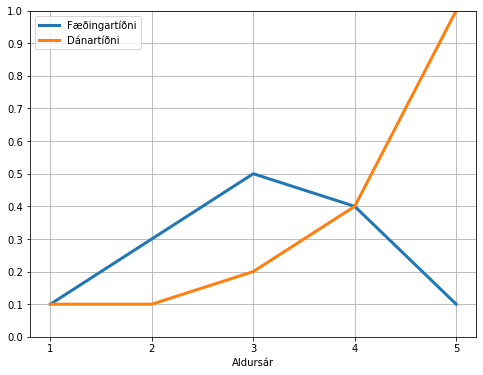

In [67]:
#c
#Teiknið mynd af fæðingar- og dánartíðninni á þessa leið (línubreidd er 3 punktar)

from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))

ftidni = np.array([np.NaN, 0.1,0.3,0.5,0.4,0.1])
dtidni = np.array([np.NaN, 0.1,0.1,0.2,0.4,1.0])

plt.plot(ftidni, lw =3, label="Fæðingartíðni")
plt.plot(dtidni, lw = 3, label="Dánartíðni")

plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xticks([1,2,3,4,5])
plt.xlim(0.8, 5.2)
plt.ylim(0.0, 1.0)
plt.xlabel('Aldursár')
plt.grid(True)
plt.legend(loc='best')
plt.show()


615


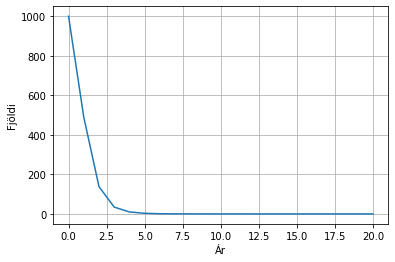

In [55]:
#d
#Teiknið mynd af þróun stofnstærðarinnar næstu 20 ár

def Stofnstaerd(n):
  return sum(la.matrix_power(L,n) @ x0)
count = 0
while Stofnstaerd(count) > 0:
  count = count + 1
print(count)

plt.plot([Stofnstaerd(i) for i in range(21)])
plt.grid(True)
plt.xlabel('Ár')
plt.ylabel('Fjöldi')
plt.show()

## **3. Verkefni 37 -  Valkvæðir stikar**

Föll geta haft **valkvæða stika** sem taka sjálfgefin gildi ef þeim er sleppt. Þannig hefur print-fallið tvo valkvæða stika, sep og end, sbr. kafla 4.4. Eftirfarandi dæmi, sem reiknar n-tu rót, sýnir hvernig hægt er að skilgreina fall með valkvæðan stika. Fallið reiknar kvaðratrót ef seinna viðfanginu er sleppt og prentar því út ``rætur: 4 og 2``.

```python
import math
def rót(x, n=2):  # skilar n-tu rót (n=2 er sjálfgefið)
   return x**(1/n)

a = rót(16)
b = rót(16, 4)
print(f"rætur: {a} og {b}")
```


<ol type="a">

 <il>Skrifið svona fall fyrir logra (logarithm) með grunntölu 𝑎 skv. formúlunni:

$log_𝑎(𝑥)=\frac{ln(x)}{ln(a)}$

þar sem ***ln*** er náttúrulegi logrinn, sem í Python er reiknaður með ``math.log(x)``. Látið a vera valkvæðan stika með sjálfgefið gildi 10. Prófið að reikna log10(100), log3(243) og log2(128) sem ætti að gefa 2, 5 og 7. </il>

 <il>Skrifið fall sem prentar lista af tölum með nauk stöfum fyrir aftan kommu með nauk = 4 sjálfgefið. Ef það fær listann:

``[[math.exp(x) for x in range(6)]``

og auk = 3 ætti það að prenta út ``[1.000, 2.718, 7.389, 20.086, 54.598, 148.413]``. </il>
</ol>



In [59]:
#a
import math

def logri(x, a):
  return math.log(x, a)

b = logri(100, 10)
c = logri(243, 3)
d = logri(128, 2)

print(f'log10(100) = {b}, log3(243) = {c:.1f} og log2(128) = {d}')

log10(100) = 2.0, log3(243) = 5.0 og log2(128) = 7.0


In [60]:
#b

def listi(x, nauk=4):
  for v in x:
    print("%0.*f" % (nauk, v))


listi([math.exp(x) for x in range(6)], 3)

1.000
2.718
7.389
20.086
54.598
148.413
